<a href="https://colab.research.google.com/github/efthymios19/HYDRUS_GoogleColab/blob/main/Examples/Hydrus_example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Install Fortran compiler
!apt-get update -qq
!apt-get install -y gfortran make

# Step 2: Clone the HYDRUS Fortran source code repository
!rm -rf /content/source_code
!git clone https://github.com/phydrus/source_code.git
%cd /content/source_code/source

# Step 3: Compile HYDRUS using gfortran
!gfortran -O2 -o hydrus HYDRUS.FOR INPUT.FOR HYSTER.FOR MATERIAL.FOR OUTPUT.FOR SINK.FOR SOLUTE.FOR TEMPER.FOR TIME.FOR WATFLOW.FOR

# Step 4: Verify the executable was created
!ls -l hydrus
!file hydrus


### Παράδειγμα 1 HYDRUS

In [ ]:
!rm -rf /content/HYDRUS_GoogleColab
# Clone the repository
!git clone https://github.com/efthymios19/HYDRUS_GoogleColab.git

# Make the hydrus file executable
!chmod +x /content/HYDRUS_GoogleColab/bin/hydrus_1

# To avoid some Google Colab unconvenients
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)



In [ ]:
!pip install phydrus

In [ ]:
import phydrus as ps
%matplotlib inline

**Πηγές τεκμηρίωσης**

https://phydrus.readthedocs.io/en/latest/index.html

https://www.pc-progress.com/Downloads/Pgm_hydrus1D/HYDRUS1D-4.17.pdf

https://www.pc-progress.com/en/Default.aspx?hydrus-1d

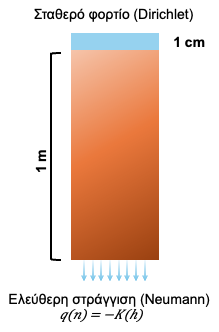

In [ ]:
# Folder for Hydrus files to be stored
ws = '/content/HYDRUS_GoogleColab/modelFiles' #use particular names
exe = '/content/HYDRUS_GoogleColab/bin/hydrus_1'

# Περιγραφή
desc = "Infiltration of Water into a Single-Layered Soil Profile"

# Δημιουργία του μοντέλου
ml = ps.Model(exe_name=exe, ws_name=ws, name="model", description=desc, mass_units="mmol",
              time_unit="days", length_unit="cm")

ml.basic_info["lFlux"] = True # Αν θέλουμε ο κώδικας να τυπώσει τις ροές για κάθε στοιχείο παρατήρησης (True)

ml.basic_info["lShort"] = False # Οι πληροφορίες τυπώνονται για κάθε χρονικό βήμα (False)

ml.add_time_info(tmax=1, print_times=True, nsteps=12, dt=0.001)

# tmax (int, optional) – Τελικός χρόνος της προσομοίωσης [T].
# nsteps (str, optional) – Ο αριθμός των χρονικών βημάτων για την χρονική περίοδο προσομοίωσης.
# dt (float, optional) – Η αρχική προσαύξηση χρόνου [T]. Για προβλήματα με υψηλές πιέσεις (π.χ. διήθηση σε αρχικά ξηρό εδαφικό μεσό)
# το dt πρέπει να είναι αρκετά μικρό.

In [ ]:
ml.add_waterflow(model=0, top_bc=0, bot_bc=4) # model (int, optional) – Παραμετρικό μοντέλο: 0 = van Genuchten"s [1980] model with 6 parameters
                                     # top_bc (int, optional) – Οριακή συνθήκη στο ανώτερο τμήμα της στήλης: 0 = Constant Pressure Head
                                     # bot_bc (int, optional) – Οριακή συνθήκη στο κατώτερο τμήμα της στήλης: 4 = Free Drainage

m = ml.get_empty_material_df(n=1) # παίρνετε μια άδεια dataframe με τις παραμέτρους της υδραυλικής εξίσωσης

# Pandas dataframe .loc (Πρόσβαση σε μία ομάδα γραμμών και στηλών με βάση τον δείκτη)

m.loc[[1]] = [[0.078, 0.43, 0.036, 1.56, 24.96, 0.5]] # Κατά σειρά:  θr, θs, α, n, Ks f, l

ml.add_material(m) # εισαγωγή των υδραυλικών παραμέτρων στο μοντέλο ml



In [ ]:
elements = 100  # Διακριτοποίηση της στήλης σε 100 σημεία

depth = -100  # Βάθος της εδαφικής στήλης

ihead = -100  # Καθορισμός αρχικών συνθηκών πίεσης (τριχοειδές δυναμικό)

# Create Profile
profile = ps.create_profile(bot=depth, dx=abs(depth / elements), h=ihead) # bot (float or list of float, optional) – Το κατώτερο σημείο της στήλης
                                                                          # dx (float, optional) – Το μέγεθος κάθε κελιού του καννάβου
                                                                          # h (float, optional) – Αρχικές τιμές του φορτίου πίεσης

# Pandas dataframe .iloc (Πρόσβαση σε ένα στοιχείο της dataframe με βάση τη σειρά και την στήλη)

profile.iloc[0, 1] = 1  # Προσδιορισμός του φορτίου πίεσης στο άνω μέρος της στήλης (ponded)

ml.add_profile(profile)  # Προσθήκη των πληροφοριών profile στο μοντέλο

In [ ]:
# Add observation nodes at depth
ml.add_obs_nodes([-20, -40, -60, -80, -100])



In [ ]:
ml.write_input()



**SELECTOR.IN**

A. Basic Information

lWat: True (μεταβαλόμενη ροή)

lSink: True (ανάκτηση νερού από το ριζικό σύστημα)

lRoot: True (ανάπτυξη του ριζικού συστήματος)

B. Water Flow Information



C. Time Information

D. Root Growth Information

E. Heat Transport Information

K. Carbon Dioxide Transport Information

F. Solute Transport Information

L. Major Ion Chemistry Information

G. Root Water Uptake Information

**PROFILE.DAT**

H. Nodal Information

In [ ]:
ml.simulate()

**T_LEVEL.OUT**

Φορτία πίεσης και ροές στις οριακές συνθήκες και στην ζώνη ριζοστρώματος.

vTop[-] (διήθηση)

vBot [-] (έξοδος)


**RUN_INF.OUT**

Πληροφορίες για την προσομοίωση (χρόνος εκτέλεσης, κ.α.)

**OBS_NODE.OUT**

Μεταβαλλόμενες τιμές του φορτίου πίεσης, της περιεκτικότητας σε νερό, κ.α στα καθορισμένα στοιχεία παρατήρησης.

**NOD_INF.OUT**

Οι τιμές του φορτίου πίεσης, της περιεκτικότητας σε νερό, κ.α σε κάθε στοιχείο.

*Σημασία στην Υδατοχωρητικότητα*

**BALANCE.OUT**

Το αρχείο δίνει τη συνολική ποσότητα νερού, θερμότητας και διαλελυμένων ουσιών μέσα σε κάθε υπόρεπεριοχή (επίπεδο).

**I_CHECK.OUT**

Περιέχει μια πλήρη περιγραφή της χωρικής διακριτοποίησης και των υδραυλικών χαρακτηριστικών του κάθε επιπέδου.

**PROFILE.OUT**

In [ ]:
ml.plots.obs_points()



In [ ]:
ml.plots.profile_information()

In [ ]:
ml.plots.profile_information("Water Content")



In [ ]:
ml.plots.water_flow("Actual Surface Flux")



In [ ]:
ml.plots.water_flow(data="Bottom Flux")

In [ ]:
ml.plots.soil_properties()



In [ ]:
ml.plots.soil_properties(data='Hydraulic Conductivity')